In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import datetime as dt
pathname = 'Indexes/'
filename = 'sorsele-skogskyrkogard'
AllData = pd.read_csv(pathname + filename + '.csv')


In [2]:
len(AllData['Deaths'])

1896

In [3]:
all_births = pd.to_datetime(AllData['Births'], format="%Y-%m-%d", errors='coerce')
all_deaths = pd.to_datetime(AllData['Deaths'], format="%Y-%m-%d", errors='coerce')

In [4]:
bad_deaths = np.where(all_deaths.isnull())[0]
bad_births = np.where(all_births.isnull())[0]
bad_order = np.where(all_deaths < all_births)[0]
bad_rows = np.unique(np.concatenate([bad_births, bad_deaths, bad_order]))
#print(bad_deaths)
#print(bad_births)
print(bad_rows)

deaths = all_deaths.drop(bad_rows)
births = all_births.drop(bad_rows)

dates = pd.DataFrame({'births':births, 'deaths':deaths})
dates['diff'] = (dates['deaths'] - dates['births']).astype('timedelta64[D]')

[  20  118  130  469  514  764  820 1280 1531]


In [5]:
earliest = dates['births'].min().year
latest = dates['deaths'].max().year
youngest = int(dates['diff'].min() / 365)
oldest = int(dates['diff'].max() / 365)
print(dates['deaths'].min().year)

1951


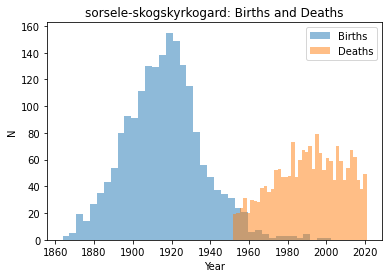

In [6]:
nbins = int((latest - earliest)/4)
plt.figure()
plt.hist(dates['births'], alpha=0.5, bins=nbins, label='Births')
plt.hist(dates['deaths'], alpha=0.5, bins=nbins, label='Deaths')
#plt.vlines(dt.datetime(1939, 9, 1), 0, 50, linestyle='dashed') # WWII start date
#plt.vlines(dt.datetime(1945, 9, 2), 0, 50, linestyle='dashed') # WWII end date
#plt.fill_betweenx(50, dt.datetime(1939, 9, 1), dt.datetime(1945, 9, 2))
plt.title(filename + ': Births and Deaths')
plt.legend()
plt.xlabel('Year')
plt.ylabel('N')
plt.show()

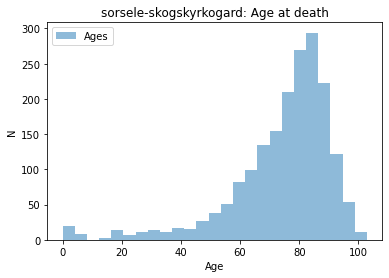

In [7]:
plt.figure()
plt.hist(dates['diff'] / 365, alpha=0.5, bins=int(oldest/4), label='Ages')
plt.title(filename + ': Age at death')
plt.legend()
plt.xlabel('Age')
plt.ylabel('N')
plt.show()

In [49]:
dates['deaths'].min().year

1951

In [50]:
diff = (deaths - births)
print(type(diff))

<class 'pandas.core.series.Series'>


In [51]:
dt.datetime(1939, 9, 1)

datetime.datetime(1939, 9, 1, 0, 0)

In [53]:
AllData['Names']

0                       Karl Alenius
1            Mauritz Axelsson Linder
2       Hedvig Valborg Berglund /mor
3                 Sven Viktor Bjurén
4               Tage Ingvar Bjurhage
                    ...             
1891           Siri Elsine Lundström
1892           Jan Leo Haldo Löfdahl
1893    Maria Anneli Aulikki Löfdahl
1894             Aida Lucia Molander
1895      Jenny Ann-Charlott Persson
Name: Names, Length: 1896, dtype: object

In [87]:
oldest

126

Ideas:
* Sorting within a block
* Extract first/middle/last names. Consider:
    * Case insensitive
    * Maiden/married names
    * Nicknames (in quotes)
    * Children (underage)    
* Most common first/last names - wordcloud package
* Sort by burial site and see if the order tells me anything
* A list of incomplete/incorrect data to return to the parish